In [2]:
import pandas as pd


In [3]:
# LOAD RAW DATA
import pandas as pd

df = pd.read_csv("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\fraud_dataset_10000.csv")
df


,transaction_id,customer_id,kyc_verified,account_age_days,transaction_amount,channel,timestamp,is_fraud
0,TXN_000001,CUST_00861,Yes,711,108.88,POS,2023-06-22 22:43:23,0
1,TXN_000002,CUST_01295,No,181,3294.45,Web,2023-02-08 20:28:06,1
2,TXN_000003,CUST_01131,Yes,112,1229.89,Mobile,2024-03-03 05:50:10,1
3,TXN_000004,CUST_01096,Yes,441,353.67,Mobile,2024-01-16 10:13:48,0
4,TXN_000005,CUST_01639,Yes,963,222.56,Mobile,2023-12-13 17:53:58,0
...,...,...,...,...,...,...,...,...
9995,TXN_009996,CUST_02226,Yes,1067,201.70,POS,2025-08-15 11:08:38,0
9996,TXN_009997,CUST_02890,No,1124,40.37,POS,2023-07-12 17:08:56,0
9997,TXN_009998,CUST_01378,Yes,1358,364.31,POS,2024-04-24 18:42:41,0
9998,TXN_009999,CUST_01178,Yes,261,5528.21,POS,2024-01-03 05:29:37,1


In [4]:
#HANDLE MISSING VALUES
print("\nMissing Values Before Handling:")
print(df.isnull().sum())


Missing Values Before Handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64


In [5]:
# Fill missing KYC values with "No"
df.fillna({"kyc_verified": "No"}, inplace=True)

# Drop rows where transaction_amount is missing
df.dropna(subset=["transaction_amount"], inplace=True)

In [6]:
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
transaction_id        0
customer_id           0
kyc_verified          0
account_age_days      0
transaction_amount    0
channel               0
timestamp             0
is_fraud              0
dtype: int64


In [7]:
#Remove Duplicates
df.drop_duplicates(subset="transaction_id", inplace=True)


In [8]:
#Standardize Columns
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["channel"] = df["channel"].str.title()
df["transaction_amount"] = df["transaction_amount"].astype(float)

In [9]:
#Feature Engineering
df["hour"] = df["timestamp"].dt.hour
df["day"] = df["timestamp"].dt.day
df["month"] = df["timestamp"].dt.month
df["weekday"] = df["timestamp"].dt.weekday

In [10]:
# Create binary feature for high value transactions
df["is_high_value"] = (df["transaction_amount"] > 50000).astype(int)


In [11]:
output_path = "C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\Data\\transactions_processed.csv"
df.to_csv(output_path, index=False)


In [12]:
print(f"\n✅ Data cleaning & preprocessing complete. File saved at: {output_path}")


✅ Data cleaning & preprocessing complete. File saved at: C:\Users\DELL\Downloads\LLM Backend\Backend\Data\transactions_processed.csv


In [13]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

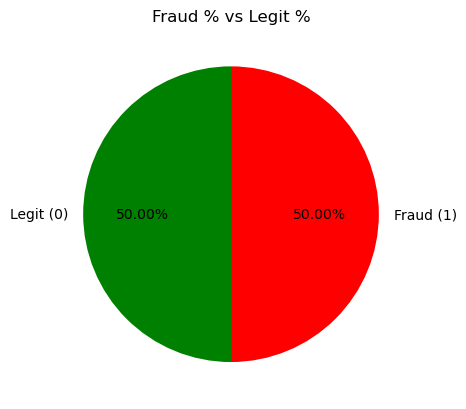

In [14]:
fraud_counts = df["is_fraud"].value_counts(normalize=True) * 100
plt.pie(
    fraud_counts,
    labels=["Legit (0)", "Fraud (1)"],
    autopct="%.2f%%",
    startangle=90,
    colors=["green", "red"]
)
plt.title("Fraud % vs Legit %")

# ✅ Save to your folder with double backslashes
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Fraud_vs_Legit.png")

plt.show()


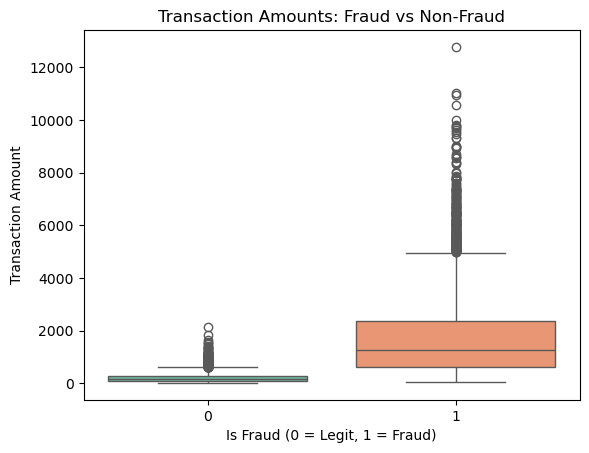

In [15]:
# Avg Transaction Amount: Fraud vs Non-Fraud
sns.boxplot(
    x="is_fraud",
    y="transaction_amount",
    hue="is_fraud",
    data=df,
    palette="Set2",
    legend=False
)
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Transaction Amount")

# ✅ Save to your folder with double backslashes
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Avg_Transaction_Amount.png")

plt.show()


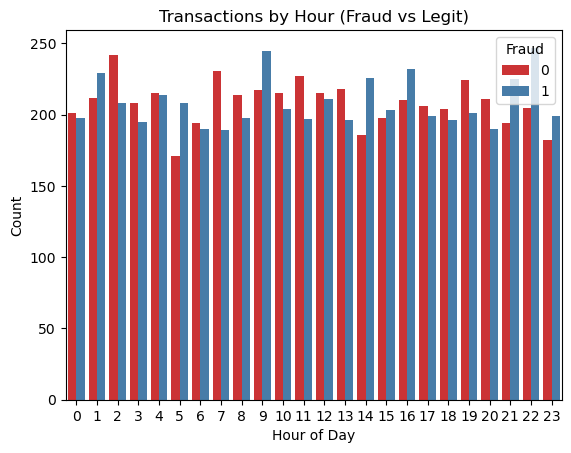

In [16]:
# Transactions by Hour of Day
sns.countplot(x="hour", hue="is_fraud", data=df, palette="Set1")
plt.title("Transactions by Hour (Fraud vs Legit)")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Transactions_by_hour.png")
plt.show()


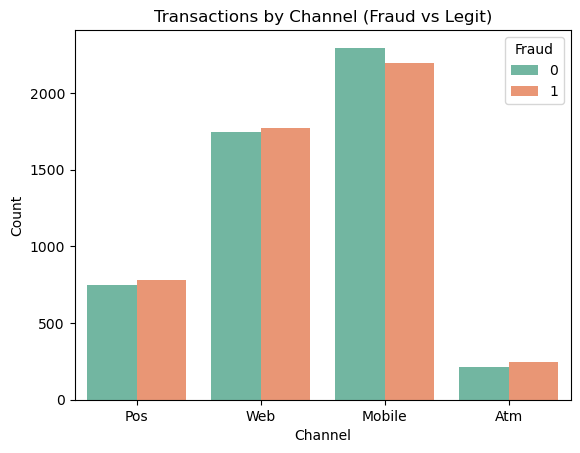

In [17]:
#Transactions by Channel
sns.countplot(x="channel", hue="is_fraud", data=df, palette="Set2")
plt.title("Transactions by Channel (Fraud vs Legit)")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Transactions_by_channel.png")
plt.show()

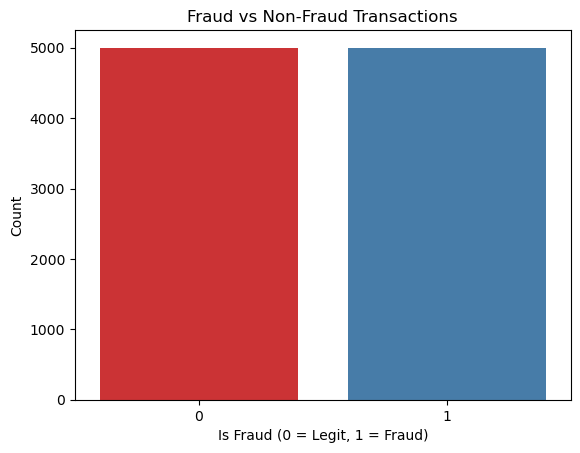

In [18]:
# Fraud vs Non-Fraud Distribution (countplot)
sns.countplot(
    x="is_fraud",
    hue="is_fraud",
    data=df,
    palette="Set1",
    legend=False
)
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")

# ✅ Save to your folder with double backslashes
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Fraud_vs_Non-Fraud_distribution.png")

plt.show()


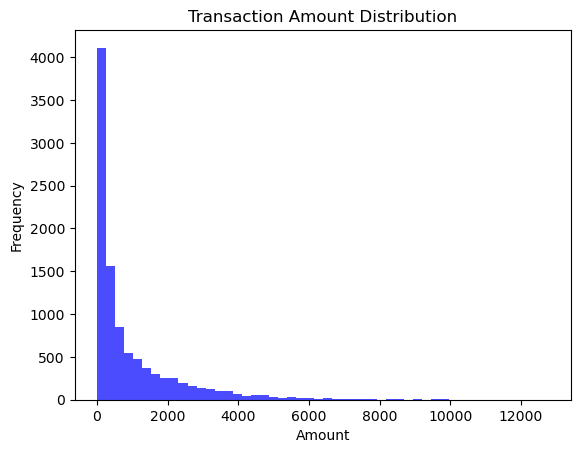

In [19]:
# Transaction Amount Distribution (histogram)
plt.hist(df["transaction_amount"], bins=50, color="blue", alpha=0.7)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")

# ✅ Save to your folder with double backslashes
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\Transaction_Amount_Distribution.png")

plt.show()


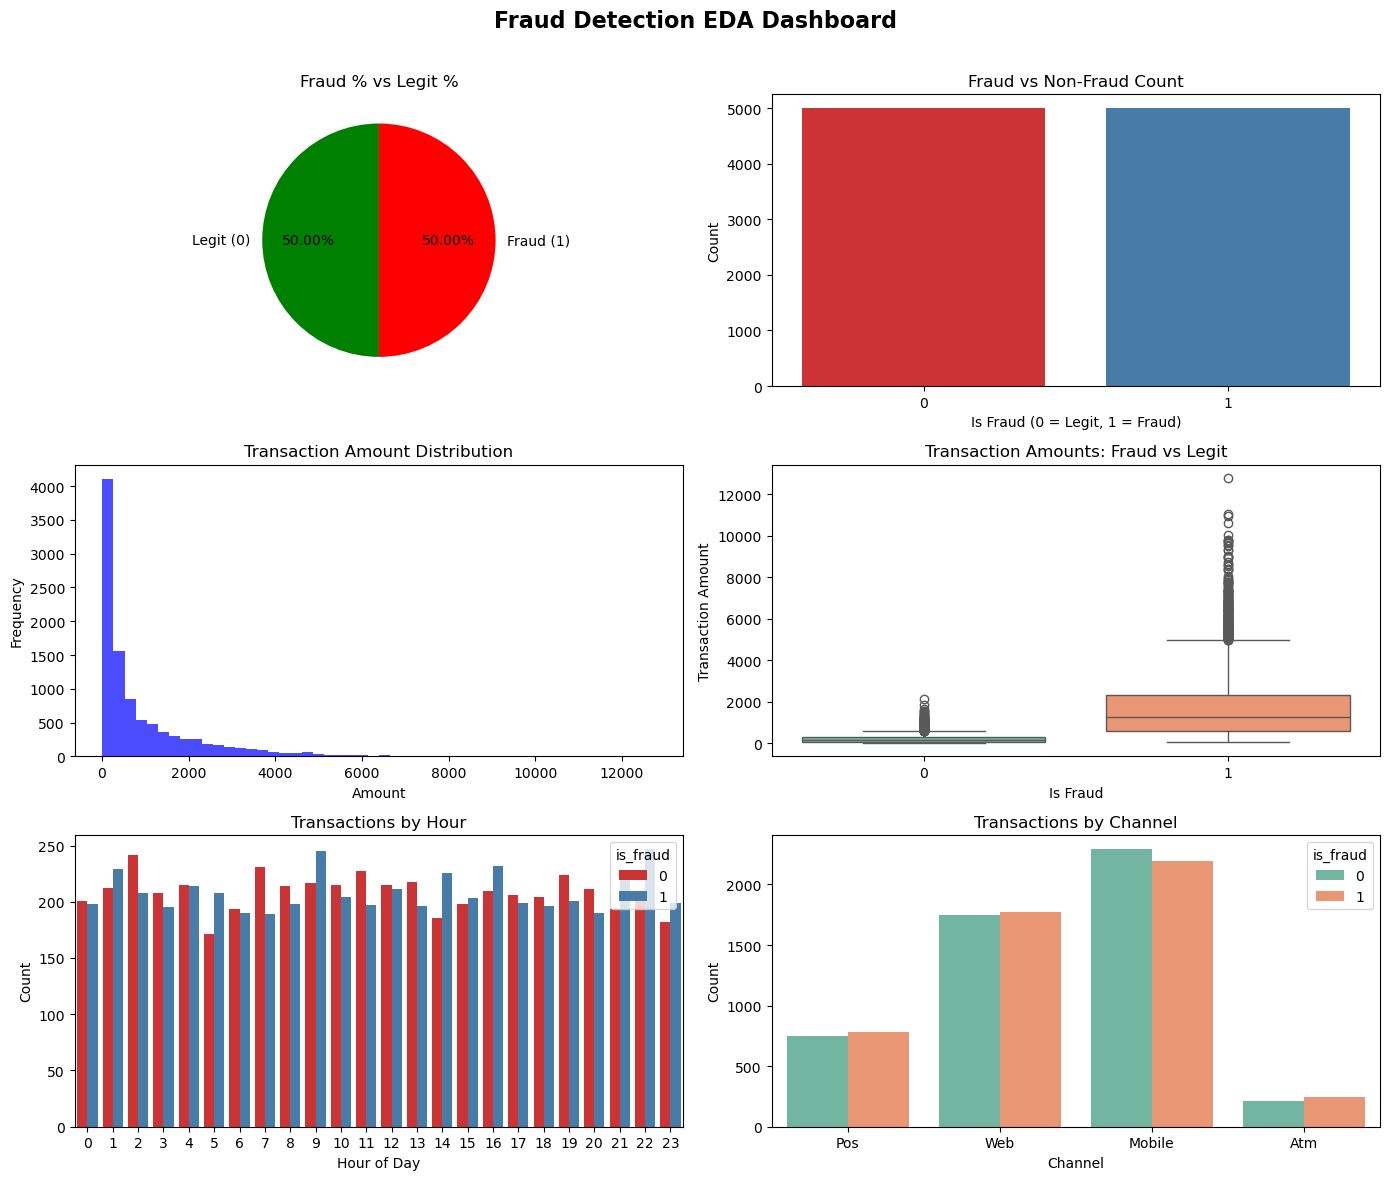

In [20]:
# SINGLE SUMMARY DASHBOARD PLOT
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Fraud Detection EDA Dashboard", fontsize=16, fontweight="bold")

# 1. Fraud % vs Legit % (Pie)
fraud_counts = df["is_fraud"].value_counts(normalize=True) * 100
axes[0,0].pie(
    fraud_counts,
    labels=["Legit (0)", "Fraud (1)"],
    autopct="%.2f%%",
    startangle=90,
    colors=["green", "red"]
)
axes[0,0].set_title("Fraud % vs Legit %")

# 2. Fraud vs Non-Fraud Distribution (Bar)
sns.countplot(x="is_fraud", hue="is_fraud", data=df, palette="Set1", legend=False, ax=axes[0,1])
axes[0,1].set_title("Fraud vs Non-Fraud Count")
axes[0,1].set_xlabel("Is Fraud (0 = Legit, 1 = Fraud)")
axes[0,1].set_ylabel("Count")

# 3. Transaction Amount Distribution (Histogram)
axes[1,0].hist(df["transaction_amount"], bins=50, color="blue", alpha=0.7)
axes[1,0].set_title("Transaction Amount Distribution")
axes[1,0].set_xlabel("Amount")
axes[1,0].set_ylabel("Frequency")

# 4. Avg Transaction Amount (Boxplot Fraud vs Legit)
sns.boxplot(x="is_fraud", y="transaction_amount", hue="is_fraud", data=df,
            palette="Set2", legend=False, ax=axes[1,1])
axes[1,1].set_title("Transaction Amounts: Fraud vs Legit")
axes[1,1].set_xlabel("Is Fraud")
axes[1,1].set_ylabel("Transaction Amount")

# 5. Transactions by Hour (Fraud vs Legit)
sns.countplot(x="hour", hue="is_fraud", data=df, palette="Set1", ax=axes[2,0])
axes[2,0].set_title("Transactions by Hour")
axes[2,0].set_xlabel("Hour of Day")
axes[2,0].set_ylabel("Count")

# 6. Transactions by Channel (Fraud vs Legit)
sns.countplot(x="channel", hue="is_fraud", data=df, palette="Set2", ax=axes[2,1])
axes[2,1].set_title("Transactions by Channel")
axes[2,1].set_xlabel("Channel")
axes[2,1].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.97])  # leave space for main title

# ✅ Save to your folder with double backslashes
plt.savefig("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\EDA\\SINGLE_SUMMARY_DASHBOARD_PLOT.png")

plt.show()


In [21]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Stratified split to maintain fraud ratio
train, test = train_test_split(
    df,
    test_size=0.2,
    stratify=df["is_fraud"],
    random_state=42
)

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

# ✅ Save train and test sets to your folder
train.to_csv("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\Data\\train.csv", index=False)
test.to_csv("C:\\Users\\DELL\\Downloads\\LLM Backend\\Backend\\Data\\test.csv", index=False)


Train Shape: (8000, 13)
Test Shape: (2000, 13)


In [22]:
#LABEL TRANSACTION
# Make sure it's binary (0 = Legit, 1 = Fraud)
df["is_fraud"] = df["is_fraud"].astype(int)

# Map into human-readable labels if needed
df["label"] = df["is_fraud"].map({0: "Legitimate", 1: "Fraudulent"})

In [23]:
print(df["is_fraud"].value_counts())
print(df["label"].value_counts(normalize=True) * 100)


is_fraud
0    5000
1    5000
Name: count, dtype: int64
label
Legitimate    50.0
Fraudulent    50.0
Name: proportion, dtype: float64


In [24]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install pymysql sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
from sqlalchemy import create_engine, text

# Load the processed dataset
df = pd.read_csv(r"C:\Users\DELL\Downloads\LLM Backend\Backend\Data\transactions_processed.csv")

# MySQL credentials
user = "root"
password = "123456"
host = "127.0.0.1"
port = 3306
database = "fraud_detection_new"   # new database name

# Step 1: Connect to MySQL server (without database)
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/")

# Step 2: Create the new database (if not exists)
with engine.connect() as conn:
    conn.execute(text(f"CREATE DATABASE IF NOT EXISTS {database};"))
    print(f"Database '{database}' created (if it didn’t exist).")

# Step 3: Connect again, this time to the new database
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Step 4: Save dataframe to the new database
df.to_sql("transactions", con=engine, if_exists="replace", index=False)
print(f"Processed data stored in MySQL -> {database}.transactions")


Database 'fraud_detection_new' created (if it didn’t exist).
Processed data stored in MySQL -> fraud_detection_new.transactions


In [27]:
import pandas as pd

query = "SELECT channel, COUNT(*) AS total, SUM(is_fraud) AS frauds FROM transactions GROUP BY channel;"
df_sql = pd.read_sql(query, con=engine)
print(df_sql)

  channel  total  frauds
0     Pos   1528   783.0
1     Web   3521  1773.0
2  Mobile   4489  2195.0
3     Atm    462   249.0
